# Pandas Groupby with Filter() Implementation

# Student Behavioral Dataset

About Dataset

Student Performance & Behavior Dataset

* This dataset is real data of 5,000 records collected from a private learning provider.
* The dataset includes key attributes necessary for exploring patterns, correlations, and insights related to academic performance.

Columns:

* Student_ID: Unique identifier for each student.
* First_Name: Student’s first name.
* Last_Name: Student’s last name.
* Email: Contact email (can be anonymized).
* Gender: Male, Female, Other.
* Age: The age of the student.
* Department: Student's department (e.g., CS, Engineering, Business).
* Attendance (%): Attendance percentage (0-100%).
* Midterm_Score: Midterm exam score (out of 100).
* Final_Score: Final exam score (out of 100).
* Assignments_Avg: Average score of all assignments (out of 100).
* Quizzes_Avg: Average quiz scores (out of 100).
* Participation_Score: Score based on class participation (0-10).
* Projects_Score: Project evaluation score (out of 100).
* Total_Score: Weighted sum of all grades.
* Grade: Letter grade (A, B, C, D, F).
* Study_Hours_per_Week: Average study hours per week.
* Extracurricular_Activities: Whether the student participates in extracurriculars (Yes/No).
* Internet_Access_at_Home: Does the student have access to the internet at home? (Yes/No).
* Parent_Education_Level: Highest education level of parents (None, High School, Bachelor's, Master's, PhD).
* Family_Income_Level: Low, Medium, High.
* Stress_Level (1-10): Self-reported stress level (1: Low, 10: High).
* Sleep_Hours_per_Night: Average hours of sleep per night.

The Attendance is not part of the Total_Score or has very minimal weight.

Calculating the weighted sum:

Total Score=a⋅Midterm+b⋅Final+c⋅Assignments+d⋅Quizzes+e⋅Participation+f⋅Projects

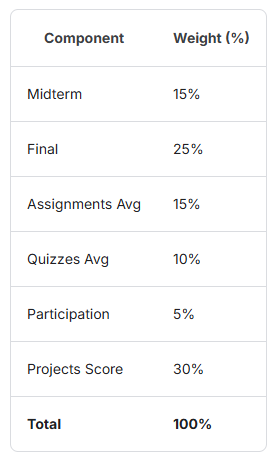

Dataset contains:

* Missing values (nulls): in some records (e.g., Attendance, Assignments, or Parent Education Level).
* Bias in some Datae (ex: grading e.g., students with high attendance get slightly better grades).
* Imbalanced distributions (e.g., some departments having more students).

# 1. Import the dataset

In [1]:
import pandas as pd

student = pd.read_csv('Students Performance Dataset.csv')

In [2]:
student.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,62.84,59.8865,F,10.3,Yes,No,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,98.23,81.9170,B,27.1,No,No,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,91.22,67.7170,D,12.4,Yes,No,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,55.48,51.6535,F,25.5,No,Yes,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,87.43,71.4030,C,13.3,Yes,No,Master's,Medium,6,4.5


In [3]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              5000 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             5000 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [4]:
student.shape

(5000, 23)

# 2. Groupby() with filter()

In Pandas, the filter() method, when used with groupby(), allows you to filter out entire groups based on a condition applied to each group. Unlike agg() or transform(), filter() returns a subset of the original DataFrame where only the rows belonging to the "passing" groups are retained.

This is extremely useful when you want to keep or discard whole groups based on some group-level property (e.g., groups with a minimum number of observations, groups where the average score is above a certain threshold, etc.).

Syntax

DataFrame.groupby(by=...).filter(func, dropna=True, *args, **kwargs)

Precise Breakdown of filter():

* DataFrame.groupby(by=...): This is your standard groupby operation, splitting the DataFrame into logical groups.
* .filter(func):
   * func: This must be a Python function (or lambda expression) that takes a DataFrame or Series (representing a group) as its argument and returns a single boolean value (True or False).
      * If func returns True for a group, all rows belonging to that group are kept in the result.
      * If func returns False for a group, all rows belonging to that group are discarded from the result.
   * dropna (default True): If True, groups that are empty after applying the function are dropped. Generally, leave this as True.
   * *args, **kwargs: Optional additional arguments to pass to the func.

Key Characteristics of filter() Output:

* Subset of Original DataFrame: The output of filter() is always a DataFrame that is a subset of the original DataFrame. It retains the original index, columns, and data, but only for the rows that belong to the groups that passed the filter condition.
* Boolean Return from func: The func passed to filter() must return a single True or False for each group. If it returns anything else, you will get an error.

When to Use filter() vs. agg()/transform() or boolean indexing:

* filter(): Use when you want to keep or remove entire groups of rows based on a group-level condition.
* agg(): Use when you want to reduce each group to a single summary statistic.
* transform(): Use when you want to calculate a group-level statistic and broadcast it back to the original shape of the DataFrame for row-wise operations.
* Boolean Indexing (after agg() or transform()): Sometimes, you can achieve similar results as filter() by first aggregating/transforming and then using boolean indexing. However, filter() is often more concise and expressive for group-wise filtering.

# 3. Data insights leveraging Groupby and filter()

* Which Departments have an average Total_Score above 71.6? (Return all students from those departments)
* Which Gender groups have at least 2500 students? (Return all students from those gender groups)
* Which Departments have a Midterm_Score standard deviation less than 17.5? (Return all students from those departments)
* Which Family_Income_Level groups have an average Stress_Level greater than 5.5? (Return all students from those income levels)
* Which Grades have at least one student with a Final_Score of 100? (Return all students from those grades)

### A. Which Departments have an average Total_Score above 71.6? (Return all students from those departments)

In [53]:
# Group by 'Department' and filter for groups where the average Total_Score is > 71.6
# The lambda function 'x' represents each department's sub-DataFrame

filtered_departments_by_avg_score = student.groupby('Department').filter(lambda x: x['Total_Score'].mean() > 71.6)

In [54]:
filtered_departments_by_avg_score['Department'].unique()

array(['Business', 'Engineering'], dtype=object)

In [55]:
# Print the filtered DataFrame

filtered_departments_by_avg_score

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Normalized_Midterm_Score_by_Dept_Avg,Total_Score_Relative_to_Dept_Max,Deviation_from_Parent_Edu_Avg,Final_Score_Z_Score_by_Dept,Assignments_Avg_Pct_of_Group_Max,Count_Same_Dept_Gender,Deviation_from_Grade_Avg_Sleep,Projects_Score_Dept_Percentile_Rank,Avg_Stress_Level_by_Extracurriculars,Deviation_from_Group_Min_Quizzes_Avg
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,0.810483,0.877845,9.602757,0.227497,74.237424,630,-2.265047,96.281646,5.542203,48.23
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,0.590601,0.730875,-5.097243,-0.329081,85.858586,687,-0.397898,82.496075,5.472532,0.00
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,0.644382,0.557500,8.002757,-1.453460,68.106811,587,-1.579928,10.243328,5.542203,16.27
6,S1006,Ahmed,Jones,student6@university.com,Male,24,Business,67.01,90.85,93.74,...,1.285706,0.887924,4.313627,1.375741,89.053432,630,-2.565047,74.287975,5.472532,4.14
7,S1007,Ahmed,Smith,student7@university.com,Male,19,Engineering,65.91,91.72,59.47,...,1.294692,0.770286,NaN,-0.582805,50.725073,687,1.285652,79.591837,5.472532,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,S5988,John,Smith,student4988@university.com,Female,19,Engineering,98.37,69.31,83.73,...,0.978359,0.806610,-8.886373,0.822524,59.275565,587,-0.814348,57.456829,5.472532,46.36
4989,S5989,Liam,Brown,student4989@university.com,Male,23,Business,90.56,73.02,61.32,...,1.033377,0.753949,-8.797243,-0.510078,65.169101,630,0.485652,64.359177,5.542203,19.89
4990,S5990,Ali,Johnson,student4990@university.com,Male,24,Engineering,53.87,81.67,80.01,...,1.152829,0.794446,-2.891107,0.607032,74.847485,687,1.085652,28.649922,5.472532,22.49
4992,S5992,Sara,Johnson,student4992@university.com,Male,18,Engineering,76.77,87.00,82.34,...,1.228066,0.907077,-2.086373,0.742004,89.163498,687,-0.165047,92.857143,5.542203,25.62


### B. Which Gender groups have at least 2500 students? (Return all students from those gender groups)

In [60]:
# Group by 'Gender' and filter for groups where the size is >= 2500
# IMPORTANT: For real data, change `len(x) >= 35` to `len(x) >= 2500`

filtered_gender_groups = student.groupby('Gender').filter(lambda x: len(x) >= 2500)

In [62]:
filtered_gender_groups['Gender'].unique()

array(['Male'], dtype=object)

In [61]:
# Print the filtered DataFrame

filtered_gender_groups

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Normalized_Midterm_Score_by_Dept_Avg,Total_Score_Relative_to_Dept_Max,Deviation_from_Parent_Edu_Avg,Final_Score_Z_Score_by_Dept,Assignments_Avg_Pct_of_Group_Max,Count_Same_Dept_Gender,Deviation_from_Grade_Avg_Sleep,Projects_Score_Dept_Percentile_Rank,Avg_Stress_Level_by_Extracurriculars,Deviation_from_Group_Min_Quizzes_Avg
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,0.810483,0.877845,9.602757,0.227497,74.237424,630,-2.265047,96.281646,5.542203,48.23
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,0.590601,0.730875,-5.097243,-0.329081,85.858586,687,-0.397898,82.496075,5.472532,0.00
5,S1005,Liam,Brown,student5@university.com,Male,21,Mathematics,60.60,70.21,64.48,...,0.987530,0.741390,NaN,-0.264309,87.867574,594,-0.897898,36.794767,5.472532,NaN
6,S1006,Ahmed,Jones,student6@university.com,Male,24,Business,67.01,90.85,93.74,...,1.285706,0.887924,4.313627,1.375741,89.053432,630,-2.565047,74.287975,5.472532,4.14
7,S1007,Ahmed,Smith,student7@university.com,Male,19,Engineering,65.91,91.72,59.47,...,1.294692,0.770286,NaN,-0.582805,50.725073,687,1.285652,79.591837,5.472532,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4990,S5990,Ali,Johnson,student4990@university.com,Male,24,Engineering,53.87,81.67,80.01,...,1.152829,0.794446,-2.891107,0.607032,74.847485,687,1.085652,28.649922,5.472532,22.49
4992,S5992,Sara,Johnson,student4992@university.com,Male,18,Engineering,76.77,87.00,82.34,...,1.228066,0.907077,-2.086373,0.742004,89.163498,687,-0.165047,92.857143,5.542203,25.62
4995,S5995,Ahmed,Jones,student4995@university.com,Male,19,CS,96.09,45.86,45.63,...,0.653198,0.563110,-9.492600,-1.420767,74.144829,640,-1.979928,3.389831,5.542203,31.49
4996,S5996,Emma,Brown,student4996@university.com,Male,19,Mathematics,96.30,78.67,47.42,...,1.106523,0.642676,NaN,-1.259030,57.901580,594,0.720072,4.987735,5.542203,NaN


### C. Which Departments have a Midterm_Score standard deviation less than 17.5? (Return all students from those departments)

In [66]:
# Group by 'Department' and filter for groups where the standard deviation of 'Midterm_Score' is less than 17.5
# The lambda function 'x' represents each department's sub-DataFrame
# Note: For groups with only one student, std will be NaN, which will evaluate as False for < 17.5.
# If you want to include single-student departments where std is technically 0, you might need
# to handle NaN explicitly (e.g., using .fillna(0) before comparison, but for std, NaN is correct).

filtered_departments_by_midterm_std = student.groupby('Department').filter(lambda x: x['Midterm_Score'].std() < 17.5)

In [68]:
filtered_departments_by_midterm_std['Department'].unique()

array(['Business', 'Engineering', 'CS'], dtype=object)

In [67]:
# Print the filtered DataFrame

filtered_departments_by_midterm_std

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Normalized_Midterm_Score_by_Dept_Avg,Total_Score_Relative_to_Dept_Max,Deviation_from_Parent_Edu_Avg,Final_Score_Z_Score_by_Dept,Assignments_Avg_Pct_of_Group_Max,Count_Same_Dept_Gender,Deviation_from_Grade_Avg_Sleep,Projects_Score_Dept_Percentile_Rank,Avg_Stress_Level_by_Extracurriculars,Deviation_from_Group_Min_Quizzes_Avg
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,0.810483,0.877845,9.602757,0.227497,74.237424,630,-2.265047,96.281646,5.542203,48.23
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,0.590601,0.730875,-5.097243,-0.329081,85.858586,687,-0.397898,82.496075,5.472532,0.00
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,0.644382,0.557500,8.002757,-1.453460,68.106811,587,-1.579928,10.243328,5.542203,16.27
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,0.756747,0.750887,-3.992600,-0.461541,67.673535,599,-2.014348,73.849879,5.472532,33.94
6,S1006,Ahmed,Jones,student6@university.com,Male,24,Business,67.01,90.85,93.74,...,1.285706,0.887924,4.313627,1.375741,89.053432,630,-2.565047,74.287975,5.472532,4.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,S5992,Sara,Johnson,student4992@university.com,Male,18,Engineering,76.77,87.00,82.34,...,1.228066,0.907077,-2.086373,0.742004,89.163498,687,-0.165047,92.857143,5.542203,25.62
4993,S5993,Ali,Johnson,student4993@university.com,Female,22,CS,50.82,53.45,98.33,...,0.761305,0.711814,5.308893,1.711280,61.356136,599,0.602102,11.824052,5.542203,5.99
4995,S5995,Ahmed,Jones,student4995@university.com,Male,19,CS,96.09,45.86,45.63,...,0.653198,0.563110,-9.492600,-1.420767,74.144829,640,-1.979928,3.389831,5.542203,31.49
4997,S5997,John,Brown,student4997@university.com,Female,24,CS,89.94,50.84,65.83,...,0.724130,0.786148,NaN,-0.220248,84.740845,599,0.085652,96.690880,5.542203,NaN


### D. Which Family_Income_Level groups have an average Stress_Level greater than 5.5? (Return all students from those income levels)

In [75]:
# Group by 'Family_Income_Level' and filter for groups where the average Stress_Level is > 5.5
# The lambda function 'x' represents each income level's sub-DataFrame

filtered_income_levels_by_stress = student.groupby('Family_Income_Level').filter(lambda x: x['Stress_Level (1-10)'].mean() > 5.5)

In [77]:
filtered_income_levels_by_stress['Family_Income_Level'].unique()

array(['Medium', 'Low'], dtype=object)

In [76]:
# Print the filtered DataFrame

filtered_income_levels_by_stress

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Normalized_Midterm_Score_by_Dept_Avg,Total_Score_Relative_to_Dept_Max,Deviation_from_Parent_Edu_Avg,Final_Score_Z_Score_by_Dept,Assignments_Avg_Pct_of_Group_Max,Count_Same_Dept_Gender,Deviation_from_Grade_Avg_Sleep,Projects_Score_Dept_Percentile_Rank,Avg_Stress_Level_by_Extracurriculars,Deviation_from_Group_Min_Quizzes_Avg
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,0.571195,0.652067,-6.992600,-0.548265,73.704741,629,-0.579928,26.819297,5.472532,3.13
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,0.810483,0.877845,9.602757,0.227497,74.237424,630,-2.265047,96.281646,5.542203,48.23
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,0.590601,0.730875,-5.097243,-0.329081,85.858586,687,-0.397898,82.496075,5.472532,0.00
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,0.644382,0.557500,8.002757,-1.453460,68.106811,587,-1.579928,10.243328,5.542203,16.27
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,0.756747,0.750887,-3.992600,-0.461541,67.673535,599,-2.014348,73.849879,5.472532,33.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,S5993,Ali,Johnson,student4993@university.com,Female,22,CS,50.82,53.45,98.33,...,0.761305,0.711814,5.308893,1.711280,61.356136,599,0.602102,11.824052,5.542203,5.99
4994,S5994,John,Johnson,student4994@university.com,Female,19,Mathematics,62.57,58.18,42.62,...,0.818324,0.671568,9.413627,-1.538905,56.421284,629,0.802102,71.218316,5.542203,21.86
4995,S5995,Ahmed,Jones,student4995@university.com,Male,19,CS,96.09,45.86,45.63,...,0.653198,0.563110,-9.492600,-1.420767,74.144829,640,-1.979928,3.389831,5.542203,31.49
4996,S5996,Emma,Brown,student4996@university.com,Male,19,Mathematics,96.30,78.67,47.42,...,1.106523,0.642676,NaN,-1.259030,57.901580,594,0.720072,4.987735,5.542203,NaN


### E. Which Grades have at least one student with a Final_Score of 100? (Return all students from those grades)

In [79]:
# Group by 'Grade' and filter for groups where at least one student has a Final_Score of 100
# The lambda function 'x' represents each grade's sub-DataFrame
# .any() checks if any element in the Series satisfies the condition

filtered_grades_by_final_score_100 = student.groupby('Grade').filter(lambda x: (x['Final_Score'] == 100).any())

In [81]:
# Print the filtered DataFrame

filtered_grades_by_final_score_100

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Normalized_Midterm_Score_by_Dept_Avg,Total_Score_Relative_to_Dept_Max,Deviation_from_Parent_Edu_Avg,Final_Score_Z_Score_by_Dept,Assignments_Avg_Pct_of_Group_Max,Count_Same_Dept_Gender,Deviation_from_Grade_Avg_Sleep,Projects_Score_Dept_Percentile_Rank,Avg_Stress_Level_by_Extracurriculars,Deviation_from_Group_Min_Quizzes_Avg


### Their is no student who scored 100

# COMPLETED